# Calculation of summary indicators (revenue, redemption rate, average cheque, etc.)

In [62]:
#function for calculating the average value
def MeanValue(i):
    df.groupby(['Order_ID']) #номер чека
    return i.mean()

In [63]:
#aggregation function for calculating summary data (revenue, average cheque, number of unique customers and products, etc.).
agg_func = {'RowSum': ['sum'], #total revenue for all products
            'Order_ID': ['nunique'], #number of unique cheques
            'Phone_new': ['nunique'], #number of unique customers
            'FullSum': [MeanValue], # average cheque
            'Quant': [MeanValue, 'sum'], # number of goods (average and total)
            'TN': ['nunique'],#number of unique categories in TN
            'TK': ['nunique']}#number of unique categories in TK

In [64]:
#placed orders
df_Order = df.groupby(['месяц']).agg(agg_func)
df_Order

RowSum Order_ID Phone_new       FullSum     Quant           \
                sum  nunique   nunique     MeanValue MeanValue      sum   
месяц                                                                     
201603  138523820.0     7253      6388  22165.086054  1.166639  21059.0   
201604  139514648.0     7009      6135  23559.359129  1.167799  20454.0   

            TN      TK  
       nunique nunique  
месяц                   
201603      13      96  
201604      13      91

In [65]:
#purchased goods
df_Paid = df[df['Status'] == 'Выдан клиенту'].groupby(['месяц']).agg(agg_func)
df_Paid

RowSum Order_ID Phone_new       FullSum     Quant           \
               sum  nunique   nunique     MeanValue MeanValue      sum   
месяц                                                                    
201603  76210499.0     4841      4601  17561.148372  1.094247  12667.0   
201604  76311308.0     4647      4403  18495.548764  1.112047  12545.0   

            TN      TK  
       nunique nunique  
месяц                   
201603      13      93  
201604      13      87

In [66]:
#redemption percentage
df_ProcentPaid = (df_Paid/df_Order)
df_ProcentPaid

RowSum  Order_ID Phone_new   FullSum     Quant                TN  \
             sum   nunique   nunique MeanValue MeanValue       sum nunique   
месяц                                                                        
201603  0.550162  0.667448  0.720257  0.792289  0.937948  0.601501     1.0   
201604  0.546977  0.663005  0.717685  0.785062  0.952259  0.613327     1.0   

              TK  
         nunique  
месяц             
201603  0.968750  
201604  0.956044

*Final preparation of data for segmentation (leave only issued orders, delete unnecessary columns)*

In [67]:
#column with order statuses
df.Status.unique()

array(['Выдан клиенту', 'Отменен', 'Отказ на месте',
       'Доставлен частично в магазин', 'Согласован',
       'Доставлен в магазин', 'Собран', 'Передан на доставку',
       'В обработке', 'Подтвержден на доставку', 'Собран частично'],
      dtype=object)

In [68]:
# leave only the rows with issued orders
df = df[~df['Status'].isin(['Отменен', 'Отказ на месте', 'Доставлен в магазин', 'Доставлен частично в магазин',
       'Согласован', 'Собран', 'В обработке', 'Передан на доставку', 'Подтвержден на доставку',
       'Ожидает осмотра', 'Не собран', 'Собран частично'])]

In [69]:
# Explore the cause of failure column
df.CancelReason.unique()

array([nan, 'Купил в магазине', 'Клиент не пришел за заказом',
       'Другое (указать в примечании)', 'Не поступила оплата',
       'Не устроила дата доставки', 'Нет связи с клиентом',
       'Неполные данные в заказе', 'Нет партнерского товара',
       'Клиент передумал', 'Не устроили характеристики товара',
       'Витринный образец/Брак товара', 'Нет товара',
       'Клиент отказался назвать причину  отмены заказа',
       'Не устроила цена партнерского товара',
       'Не устроили дата/время доставки', 'Ошибка в информации о товаре',
       'Не устроила цена'], dtype=object)

In [70]:
#exclude rows with cancelled orders for their reasons specified in the CancelReason column
df = df[~df['CancelReason'].isin(['Купил в магазине', 'Неполные данные в заказе',
       'Клиент не пришел за заказом', 'Клиент передумал',
       'Другое (указать в примечании)', 'Не устроила дата доставки',
       'Не поступила оплата', 'Нет связи с клиентом',
       'Клиент отказался назвать причину  отмены заказа',
       'Нет партнерского товара', 'Не устроили характеристики товара',
       'Витринный образец/Брак товара', 'Не устроила цена', 'Нет товара',
       'Не устроила дата доставки партнерского товара',
       'Нарушение сроков доставки',
       'Не устроила цена партнерского товара',
       'Не устроили дата/время доставки',
       'Витрина/брак/некондиция/качество товара', 'Ошибка поставки',
       'Ошибка в информации о товаре'])]

In [71]:
#The CancelReason and Status columns can now be deleted
df = df.drop(columns=['CancelReason', 'Status'])

In [72]:
#fill in empty values TN and TK
df.loc[(df.Nom_Name == 'Клавиатура Samsung VG-KBD1000'), ['TN', 'TK']] = ['Аксессуары', 'Аксессуары для комп./ноутбуков/принтеров']
df.loc[(df.Nom_Name == 'Музыкальный центр LG CM9740'), ['TN', 'TK']] = ['ТВ-Аудио', 'Аудио-Видео']
df.loc[(df.Nom_Name == 'Колонки LG CMS9740F'), ['TN', 'TK']] = ['Аксессуары', 'Аксессуары для комп./ноутбуков/принтеров']
df.loc[(df.Nom_Name == 'Автокресло Nania Beone SP Plus Boomer Carmin'), ['TN', 'TK']] = ['Детские товары', 'Прогулки и путешествие']
df.loc[(df.Nom_Name == 'Кроватка СКВ-5 544036 п.2 бук'), ['TN', 'TK']] = ['Детские товары', 'Детская комната']
df.loc[(df.Nom_Name == 'Apple iPad Pro ML0H2RU/A Wi-Fi 32Gb gold планшет'), ['TN', 'TK']] = ['Цифровая Техника', 'Планшеты']
df.loc[(df.Nom_Name == 'Apple iPad Pro ML2J2RU/A Wi-Fi Cell 128Gb  silver планшет'), ['TN', 'TK']] = ['Цифровая Техника', 'Планшеты']
df.loc[(df.Nom_Name == 'Автокресло Nania Beone SP Plus Boomer Carmin'), ['TN', 'TK']] = ['Детские товары', 'Прогулки и путешествие']
df.loc[(df.Nom_Name == 'Ресивер+сабвуфер Sony HCD-GT3D'), ['TN', 'TK']] = ['Аксессуары', 'Аксессуары ТВ-Аудио']

In [73]:
df = df.drop(columns=['NomGroup', 'PaymentDate'])

In [74]:
#Nom_Name and month columns can be deleted
df = df.drop(columns=['Nom_Name', 'месяц'])

In [75]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data_5 = []
for column in df:
    data_5.append([column] + columnValues(df[column]))

print(tabulate(data_5, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column      |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|-------------+----------------+---------------+--------------+-------------+-------------|
| Order_ID    |           9388 |             0 |            0 |           0 | object      |
| Phone_new   |           8772 |             0 |            0 |           0 | object      |
| Source      |              4 |             0 |            0 |           0 | object      |
| PaymentType |              2 |             0 |            0 |           0 | object      |
| Region      |              7 |             0 |            0 |           0 | object      |
| FullSum     |           6217 |             0 |            0 |           0 | float64     |
| Quant       |             24 |             0 |            0 |           0 | float64     |
| RowDiscount |           1010 |         19205 |            0 |           0 | float64     |
| RowSum      |           5256 |             0 |            0 |           0 | fl

In [76]:
df.shape

(22608, 11)

In [77]:
df_paid_10 = df

In [78]:
df.describe()

,FullSum,Quant,RowDiscount,RowSum
count,22608.000000,22608.000000,22608.000000,22608.000000
mean,17979.264914,1.102884,124.742525,6660.229034
std,24332.165646,0.769627,627.483951,9727.114047
min,420.000000,1.000000,0.000000,160.000000
25%,4089.750000,1.000000,0.000000,920.000000
50%,8748.000000,1.000000,0.000000,2539.000000
75%,22346.000000,1.000000,0.000000,8180.000000
max,279996.000000,49.000000,16991.000000,179999.000000


In [79]:
df.groupby('Phone_new').count().head(5)

,Order_ID,Source,PaymentType,Region,FullSum,Quant,RowDiscount,RowSum,TN,TK
Phone_new,,,,,,,,,,
32565750-575448565151 а,2,2,2,2,2,2,2,2,2,2
55485656-57565656575275,7,7,7,7,7,7,7,7,7,7
55495052-53545456564877,2,2,2,2,2,2,2,2,2,2
55545456-525253525651715,2,2,2,2,2,2,2,2,2,2
55555750-53535149574979,10,10,10,10,10,10,10,10,10,10


In [80]:
df.groupby('Phone_new').sum().head()

,Order_ID,Source,PaymentType,Region,FullSum,Quant,RowDiscount,RowSum,TN,TK
Phone_new,,,,,,,,,,
32565750-575448565151 а,5626508_BX5626508_BX,Колл-центрКолл-центр,при получениипри получении,Центральный ф.о.Центральный ф.о.,53198.0,2.0,0.0,26599.0,КлиматКлимат,КондиционерыКондиционеры
55485656-57565656575275,5477151_BX5477151_BX5830900_BX5830900_BX587246...,Онлайн-Резерв.Онлайн-Резерв.Онлайн-Резерв.Онла...,при получениипри получениипри получениипри пол...,Северо-Западный ф.о.Северо-Западный ф.о.Северо...,218495.0,7.0,0.0,83058.0,ТВ-АудиоТВ-АудиоАксессуарыМелкая бытовая техни...,Телевизоры LCDТелевизоры LCDАксессуары ТВ-Ауди...
55495052-53545456564877,5685838_BX5685838_BX,Онлайн-Резерв.Онлайн-Резерв.,при получениипри получении,Центральный ф.о.Центральный ф.о.,9938.0,2.0,0.0,4969.0,Мелкая бытовая техникаАксессуары,Уход за домомАксессуары для бытовой техники
55545456-525253525651715,5498935_ES5498935_ES,Онлайн-Резерв.Онлайн-Резерв.,при получениипри получении,Северо-Западный ф.о.Северо-Западный ф.о.,1636.0,2.0,0.0,818.0,Товары для домаТовары для дома,Товары для кухниТовары для кухни
55555750-53535149574979,5546638_BX5546638_BX5546638_BX5546638_BX554663...,Колл-центрКолл-центрКолл-центрКолл-центрКолл-ц...,при получениипри получениипри получениипри пол...,Центральный ф.о.Центральный ф.о.Центральный ф....,1716328.0,10.0,22082.0,421166.0,ТВ-АудиоТВ-АудиоТВ-АудиоАксессуарыАксессуарыТВ...,Аудио-ВидеоТелевизоры LCDАудио-ВидеоАксессуары...


In [81]:
#sorting by descending amount of revenue
sorted_df = df.groupby('Phone_new').sum().sort_values(by='RowSum', ascending=False)

In [82]:
#the top 20 clients with the most revenue
sorted_df.head(20)

,Order_ID,Source,PaymentType,Region,FullSum,Quant,RowDiscount,RowSum,TN,TK
Phone_new,,,,,,,,,,
55574954-484951565653705,5415341_BX5415341_BX5417423_BX5417423_BX543527...,Онлайн-Резерв.Онлайн-Резерв.Онлайн-Резерв.Онла...,при получениипри получениипри получениипри пол...,Северо-Западный ф.о.Северо-Западный ф.о.Северо...,2966615.0,111.0,17713.0,1354599.0,Крупная бытовая техникаКрупная бытовая техника...,Встраиваемая техникаВстраиваемая техникаПригот...
55574950-574849515256745,5463908_BX5463908_BX5463908_BX5463908_BX546390...,Онлайн-Резерв.Онлайн-Резерв.Онлайн-Резерв.Онла...,при получениипри получениипри получениипри пол...,Уральский ф.о.Уральский ф.о.Уральский ф.о.Урал...,2527456.0,54.0,15735.0,829712.0,Мелкая бытовая техникаМелкая бытовая техникаМе...,Приготовление пищиПриготовление пищиСВЧВстраив...
55555750-53535149574979,5546638_BX5546638_BX5546638_BX5546638_BX554663...,Колл-центрКолл-центрКолл-центрКолл-центрКолл-ц...,при получениипри получениипри получениипри пол...,Центральный ф.о.Центральный ф.о.Центральный ф....,1716328.0,10.0,22082.0,421166.0,ТВ-АудиоТВ-АудиоТВ-АудиоАксессуарыАксессуарыТВ...,Аудио-ВидеоТелевизоры LCDАудио-ВидеоАксессуары...
55574948-50504853505776,5422565_BX5422565_BX5422565_BX5422565_BX542256...,Онлайн-Резерв.Онлайн-Резерв.Онлайн-Резерв.Онла...,при получениипри получениипри получениипри пол...,Центральный ф.о.Центральный ф.о.Центральный ф....,1780761.0,19.0,1502.0,349080.0,Крупная бытовая техникаТВ-АудиоКрупная бытовая...,Встраиваемая техникаТелевизоры LCDВстраиваемая...
55574850-535455485554765,5526339_BX5526339_BX5655957_BX5655957_BX568455...,Онлайн-Резерв.Онлайн-Резерв.Онлайн-Резерв.Онла...,при получениипри получениипри получениипри пол...,Центральный ф.о.Центральный ф.о.Центральный ф....,689308.0,14.0,0.0,344654.0,Крупная бытовая техникаКрупная бытовая техника...,Встраиваемая техникаВстраиваемая техникаВстраи...
55574953-49525551514873,5677818_BX5677818_BX5677818_BX5677818_BX567781...,Онлайн-Резерв.Онлайн-Резерв.Онлайн-Резерв.Онла...,предоплата онлайнпредоплата онлайнпредоплата о...,Центральный ф.о.Центральный ф.о.Центральный ф....,2938532.0,14.0,0.0,339564.0,Крупная бытовая техникаМелкая бытовая техникаК...,Встраиваемая техникаПриготовление пищиВстраива...
55575054-57485155535370,5418099_BX5418099_BX5418099_BX5418496_BX541849...,Онлайн-Резерв.Онлайн-Резерв.Онлайн-Резерв.Онла...,при получениипри получениипри получениипри пол...,Центральный ф.о.Центральный ф.о.Центральный ф....,764066.0,24.0,0.0,330328.0,Мелкая бытовая техникаКрупная бытовая техникаК...,СВЧСтиральные машиныХолодильное оборудованиеПр...
55575048-52555253535774,5725962_BX5725962_BX5725962_BX,Онлайн-Резерв.Онлайн-Резерв.Онлайн-Резерв.,предоплата онлайнпредоплата онлайнпредоплата о...,Центральный ф.о.Центральный ф.о.Центральный ф.о.,839988.0,4.0,0.0,279996.0,Цифровая ТехникаЦифровая ТехникаЦифровая Техника,Мобильные средства связиМобильные средства свя...
55575653-55545557484876,5670887_BX5670887_BX5670887_BX5670887_BX567088...,Колл-центрКолл-центрКолл-центрКолл-центрКолл-ц...,предоплата онлайнпредоплата онлайнпредоплата о...,Центральный ф.о.Центральный ф.о.Центральный ф....,1637406.0,14.0,0.0,272901.0,Крупная бытовая техникаКрупная бытовая техника...,Холодильное оборудованиеСтиральные машиныВстра...


In [83]:
#sorting in ascending order of Quant items and cheque amount
sorted_df_Quant = df.groupby('Phone_new').sum().sort_values(['RowSum'])
sorted_df_Quant.head(7010)

,Order_ID,Source,PaymentType,Region,FullSum,Quant,RowDiscount,RowSum,TN,TK
Phone_new,,,,,,,,,,
55574851-575755535355775,5542741_BX5542741_BX,Онлайн-Резерв.Онлайн-Резерв.,при получениипри получении,Центральный ф.о.Центральный ф.о.,920.0,2.0,88.0,350.0,Сделай самСделай сам,ИнструментыИнструменты
55574953-485256485653775,5518767_BX5518767_BX,Онлайн-Резерв.Онлайн-Резерв.,при получениипри получении,Центральный ф.о.Центральный ф.о.,1018.0,2.0,88.0,350.0,Сделай самСделай сам,ИнструментыИнструменты
55574854-495352545349715,5415863_BX5415863_BX,Онлайн-Резерв.Онлайн-Резерв.,при получениипри получении,Центральный ф.о.Центральный ф.о.,840.0,2.0,120.0,420.0,Спорт и активный отдыхСпорт и активный отдых,ФитнесТяжелая атлетика
55574853-54555553524976,5491634_BX5491634_BX,Онлайн-Резерв.Онлайн-Резерв.,при получениипри получении,Северо-Западный ф.о.Северо-Западный ф.о.,840.0,2.0,0.0,420.0,Спорт и активный отдыхСпорт и активный отдых,Тяжелая атлетикаТяжелая атлетика
55574856-535651555048735,5528049_BX5528049_BX,Онлайн-Резерв.Онлайн-Резерв.,при получениипри получении,Центральный ф.о.Центральный ф.о.,876.0,2.0,110.0,438.0,Сделай самСделай сам,ИнструментыИнструменты
...,...,...,...,...,...,...,...,...,...,...
55574851-52554953544974,5888238_BX5888238_BX,Онлайн-Резерв.Онлайн-Резерв.,при получениипри получении,Центральный ф.о.Центральный ф.о.,51378.0,2.0,0.0,25689.0,Крупная бытовая техникаАксессуары,Стиральные машиныАксессуары для бытовой техники
55574851-52545253534975,5658640_BX5658640_BX,Колл-центрКолл-центр,при получениипри получении,Центральный ф.о.Центральный ф.о.,55158.0,2.0,0.0,25689.0,Крупная бытовая техникаКрупная бытовая техника,Стиральные машиныПлиты
55575057-53575452545577,5606849_BX5606849_BX,Онлайн-Резерв.Онлайн-Резерв.,при получениипри получении,Северо-Западный ф.о.Северо-Западный ф.о.,51396.0,2.0,0.0,25698.0,Крупная бытовая техникаАксессуары,Стиральные машиныАксессуары для бытовой техники


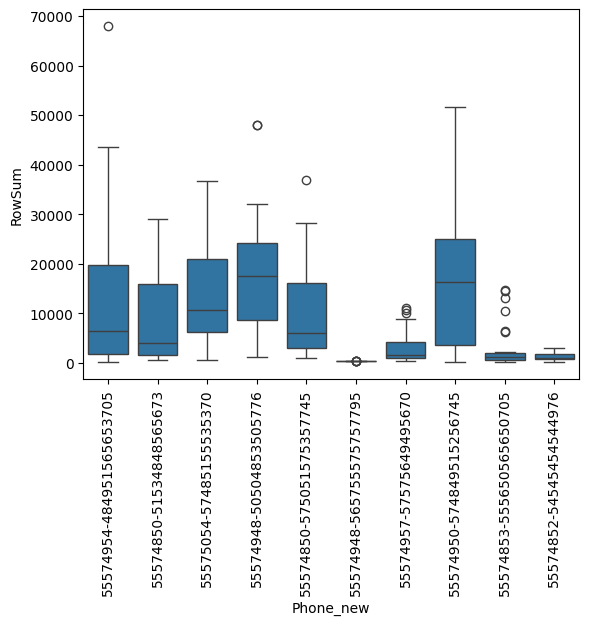

In [84]:
#Top 10 clients by number of orders:
top_clients = df['Phone_new'].value_counts().nlargest(10).index
df_top = df[df['Phone_new'].isin(top_clients)]

# Plotting Box Whiskers
sns.boxplot(x='Phone_new', y='RowSum', data=df_top)
plt.xticks(rotation=90)
plt.show()